<a href="https://colab.research.google.com/github/samtam0714/ML/blob/master/response_model_pra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Importing the dataset
dataset = pd.read_csv('.\Social_Network_Ads3.csv')

In [ ]:
#Printing the first few entries of the Dataset
print(dataset.head())
dataset

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
#Creating our X and y variables
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


In [ ]:
#We divide the data into 80% data for training and 20% for testing our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

In [ ]:
#Importing Scaling Library
from sklearn.preprocessing import StandardScaler

In [ ]:
#Creating the standard Scalar Object of the Preprocessing Class
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#Search for an optimal value of K for KNN
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 31)
k_scores = []
for k in k_range:
 knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
 #obtain cross_val_score for KNeighborsClassifier with k neighbours
 scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')

In [ ]:
 #append mean of scores for k neighbors to k_scores list
 k_scores.append(scores.mean())

In [ ]:
#Print Best Score
MSE = [1 - x for x in k_scores]
best_k = k_range[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.


In [ ]:
#Create KNN model
classifier = KNeighborsClassifier(n_neighbors = 9)

In [ ]:
#Fit KNN Model
classifier.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [ ]:
#Prediction
y_pred = classifier.predict(X_test)

In [ ]:
#Evaluate the Algorithum
from sklearn.metrics import classification_report, confusion_matrix
target_names=['Not Buy','Buy']
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=target_names))

[[46  3]
 [ 5 26]]
             precision    recall  f1-score   support

    Not Buy       0.90      0.94      0.92        49
        Buy       0.90      0.84      0.87        31

avg / total       0.90      0.90      0.90        80



In [ ]:
#Let’s try a prediction
Xnew = [[50,84000]]
Xnew = sc.transform(Xnew)
ynew = classifier.predict(Xnew)
print(ynew)

[1]


In [ ]:
#Alternative Method
error = []
for i in range(1, 31):
 knn1 = KNeighborsClassifier(n_neighbors=i)
 knn1.fit(X_train, y_train)
 pred_i = knn1.predict(X_test)
 error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

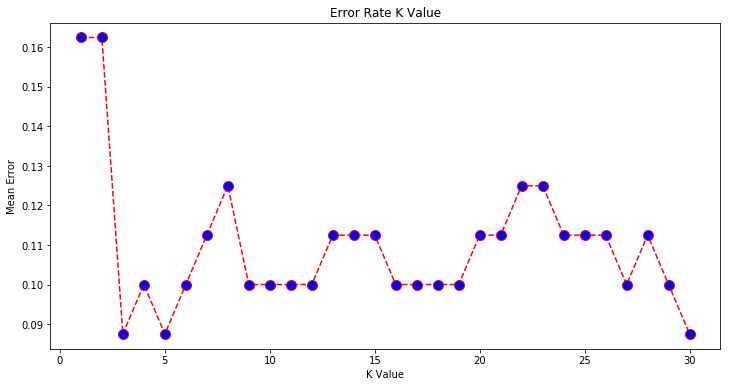

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), error, color='red', linestyle='dashed', marker='o',
 markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error') 

In [ ]:
#Create Optimal KNN model with 3
classifier2 = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
#Fit KNN Model with 4
classifier2.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [ ]:
#Prediction with 4
y_pred2 = classifier2.predict(X_test)

In [ ]:
#Evaluate the Algorithum
from sklearn.metrics import classification_report, confusion_matrix
target_names=['Not Buy','Buy']
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2,target_names=target_names))


[[47  2]
 [ 5 26]]
             precision    recall  f1-score   support

    Not Buy       0.90      0.96      0.93        49
        Buy       0.93      0.84      0.88        31

avg / total       0.91      0.91      0.91        80



In [ ]:
#Let’s try a prediction
Xnew2 = [[50,84000]]
Xnew2 = sc.transform(Xnew2)
ynew2 = classifier2.predict(Xnew2)
print(ynew2)

[1]
